<a class="anchor" id="0"></a>

# **Secondary Book: Data Testing and Data Visualizations**

- Importing necessary packages

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

- Importing CSV file via URL & showing the top rows for a brief visual of the column headers and data

In [2]:
df = pd.read_csv (r'https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv',parse_dates=True)
print ('Shape of data', df.shape)
df.head()

Shape of data (10992, 40)


,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


- Removing unnecesary columns from further analysis

In [3]:
df.drop('prnameFR', axis=1, inplace=True)
df.drop('prname', axis=1, inplace=True)
df.drop('numprob', axis=1, inplace=True)
df.drop('numtotal', axis=1, inplace=True)
df.drop('percentrecover', axis=1, inplace=True)
df.drop('update', axis=1, inplace=True)

- Descriptive Statistics

In [5]:
df.describe()

,pruid,numconf,numdeaths,numtested,numtests,numrecover,ratetested,ratetests,numtoday,percentoday,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
count,10992.000000,1.099200e+04,10873.000000,4.905000e+03,1.099200e+04,1.046800e+04,4566.000000,1.019000e+04,10992.000000,10992.000000,...,10024.000000,10740.000000,10024.000000,10740.000000,10023.000000,10740.000000,10024.000000,10740.000000,10024.000000,10263.000000
mean,39.159025,1.347841e+05,2563.093351,8.376140e+05,3.411427e+06,1.314167e+05,120898.847788,5.240332e+05,608.123544,1.796771,...,1.248642,4334.908007,89.112248,48.209125,0.629112,619.261546,12.730392,6.869181,0.089707,11.660056
std,26.271412,3.645249e+05,5903.568733,2.277015e+06,8.588308e+06,3.491962e+05,122903.439693,4.635502e+05,2300.367605,11.719928,...,2.079237,15869.337297,208.881284,136.733373,1.117166,2267.051126,29.840167,19.541269,0.159554,43.952072
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,25.000000,2.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.250000
25%,12.000000,1.840000e+02,1.000000,4.464000e+03,1.538000e+04,2.080000e+02,33416.250000,1.155890e+05,0.000000,0.000000,...,0.000000,2.000000,2.210000,0.000000,0.000000,0.000000,0.320000,0.000000,0.000000,0.000000
50%,46.000000,2.071000e+03,46.000000,5.729200e+04,2.415995e+05,2.143000e+03,80833.000000,4.019065e+05,13.000000,0.210000,...,0.315000,154.500000,17.260000,1.000000,0.140000,22.000000,2.470000,0.000000,0.020000,0.820000
75%,60.000000,7.400425e+04,1700.000000,3.741220e+05,1.670675e+06,7.134325e+04,164653.250000,8.513438e+05,373.250000,0.910000,...,1.700000,2713.250000,85.425000,26.000000,0.770000,388.000000,12.202500,4.000000,0.110000,8.410000
max,99.000000,3.342247e+06,37157.000000,1.748336e+07,5.861355e+07,3.192973e+06,705178.000000,1.923218e+06,49148.000000,600.000000,...,17.400000,295339.000000,2448.300000,1236.000000,9.310000,42191.000000,349.760000,177.000000,1.330000,1159.880000


- Data Visualizations

<AxesSubplot:>

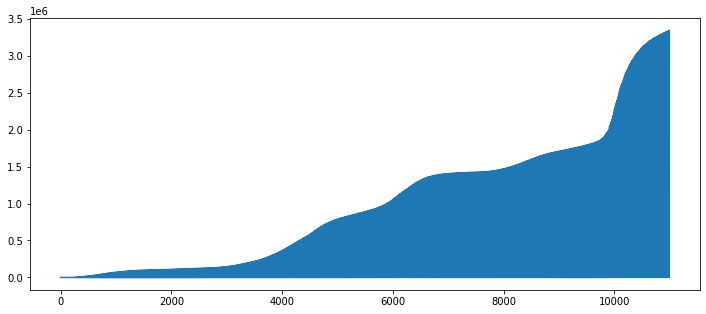

In [4]:
df['numconf'].plot(figsize=(12,5))